In [401]:
# pd.set_option('display.max_columns', None) ## 모든 열을 출력한다.
# pd.set_option('display.max_rows', None) ## 모든 행을 출력한다.

In [402]:
# pd.options.display.max_rows = 60    #원상복구
# pd.options.display.max_columns = 20

In [403]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# 감성분석 

In [404]:
df = pd.read_csv('./data/카카오(eng).csv')  #제목+본문 데이터를 구글번역기로 번역한 파일 불러오기
df

,full date,Item name,all
0,2022.06.01 05:23,cacao,"At this time, the main KAKAO is swept away by ..."
1,2022.06.01 08:44,cacao,get a lot of money and it's dissatisfying that...
2,2022.06.01 08:59,cacao,Grandpa Yoo Young-doo is very disappointing~~^...
3,2022.06.01 09:29,cacao,"I don't know what he's doing, but he's trying ..."
4,2022.06.01 09:37,cacao,An unwritten Yankee puppet who wants to fight ...
...,...,...,...
6615,2022.06.30 23:31,cacao,If you see this and think that Seok-Yeol Yoon ...
6616,2022.06.30 23:34,cacao,I can't sleep. How much will I be stuck in the...
6617,2022.06.30 23:40,cacao,I wonder what the average price was before thi...
6618,2022.06.30 23:52,cacao,"7,000 on Nasdaq. KAKAO goes 30,000. haha"


In [405]:
df.isna().sum() # 결측치 확인

full date    0
Item name    0
all          0
dtype: int64

In [406]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\subin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## 감성분석 수치

In [407]:
sia = SentimentIntensityAnalyzer()

list = []   # 빈 리스트 생성
for index, row in df.iterrows():
    list.insert(0, sia.polarity_scores(row['all']))     # 빈 리스트에 데이터 넣기


df2 = pd.DataFrame(data = list, columns=['neg', 'neu', 'pos', 'compound'], index=df.index)    # 데이터프레임에 결과 값 넣기
df2

,neg,neu,pos,compound
0,0.000,0.903,0.097,0.0762
1,0.000,0.667,0.333,0.4588
2,0.000,1.000,0.000,0.0000
3,0.143,0.857,0.000,-0.2500
4,0.344,0.656,0.000,-0.9001
...,...,...,...,...
6615,0.206,0.754,0.040,-0.9873
6616,0.000,0.750,0.250,0.7684
6617,0.178,0.703,0.119,-0.4810
6618,0.169,0.753,0.078,-0.7216


In [408]:
df2.isna().sum() # 결측치 확인

neg         0
neu         0
pos         0
compound    0
dtype: int64

In [409]:
df2 = df2.reset_index().rename(columns={"index":"index"})   # 데이터 합치기 위해서 인덱스 칼럼에 추가
df2

,index,neg,neu,pos,compound
0,0,0.000,0.903,0.097,0.0762
1,1,0.000,0.667,0.333,0.4588
2,2,0.000,1.000,0.000,0.0000
3,3,0.143,0.857,0.000,-0.2500
4,4,0.344,0.656,0.000,-0.9001
...,...,...,...,...,...
6615,6615,0.206,0.754,0.040,-0.9873
6616,6616,0.000,0.750,0.250,0.7684
6617,6617,0.178,0.703,0.119,-0.4810
6618,6618,0.169,0.753,0.078,-0.7216


In [410]:
# 강한 부정을 -2로 표기: 복합 점수가 -0.5보다 적을 때, 즉 점수 < -0.5
# 약한 부정을 -1로 표기: 복합 점수가 -0.5보다 같거나 크고 0보다 작을 때, 즉 -0.5 <= 점수 < 0 
# 중립을 0으로 표기: 복합 점수가 0일 때, 즉 점수 = 0
# 약한 긍정을 1로 표기: 복합 점수가 0보다 크고 0.5보다 같거나 작을 때, 즉 0 < 점수 <= 0.5
# 강한 긍정을 2로 표기: 복합 점수가 0.5를 초과할 때, 즉 점수 > 0.5

# def compound(c):
#     if c < -0.5:
#         return '-2'
#     if -0.5 <= c < 0:
#         return '-1'
#     if c == 0:
#         return '0'
#     if 0 < c <= 0.5:
#         return '1'
#     if c > 0.5:
#         return '2'
    

# df2['점수변환'] = df2['compound'].apply(compound)
# df2

# 종토방 데이터 + 감성분석

In [411]:
df3 = pd.read_csv('./data/카카오(kor).csv')     #제목+본문 한글 데이터 파일 불러오기
df3

,전체날짜,종목명,전체
0,2022.06.01 05:23,카카오,이시간에 KAKAO메인이 조선이 싹쓸이하네...메인 7개 뉴스중에 5개가 조선1개가...
1,2022.06.01 08:44,카카오,돈은 많이 받으면서근무시간에 오디오라인 열어놓는게 불만이라니\n그냥 집에서 누워서 ...
2,2022.06.01 08:59,카카오,유영두 할아버지 넘 실망이에요~~^^토른방에 남겨진 유영두 할아버지에 대한 댓글 입...
3,2022.06.01 09:29,카카오,빡빡이 하는짓 보면 모르나김범수가 일궈낸 자리 편하게 앉아서 메타버스 빌미로 날로 ...
4,2022.06.01 09:37,카카오,"한오백년 전쟁하자는 미필 양키괴뢰!!!우리는 원래 하나였으나, 미,소에 의해 강제로..."
...,...,...,...
6615,2022.06.30 23:31,카카오,이거보고 윤석열이 왕따라고 생각하면https://youtu.be/C2-HTUyE6Y...
6616,2022.06.30 23:34,카카오,잠이 안온다내일 인버스에 얼마나 꽂힐지..돈복사
6617,2022.06.30 23:40,카카오,이거 액분전에 평균얼마엿어요궁금합니다
6618,2022.06.30 23:52,카카오,나스닥 7천간다.\n\nKAKAO는 3만 간다.\n\nㅋㅋ


In [412]:
df3 = df3.reset_index().rename(columns={"index":"index"})   # 데이터 합치기 위해서 인덱스 칼럼에 추가
df3

,index,전체날짜,종목명,전체
0,0,2022.06.01 05:23,카카오,이시간에 KAKAO메인이 조선이 싹쓸이하네...메인 7개 뉴스중에 5개가 조선1개가...
1,1,2022.06.01 08:44,카카오,돈은 많이 받으면서근무시간에 오디오라인 열어놓는게 불만이라니\n그냥 집에서 누워서 ...
2,2,2022.06.01 08:59,카카오,유영두 할아버지 넘 실망이에요~~^^토른방에 남겨진 유영두 할아버지에 대한 댓글 입...
3,3,2022.06.01 09:29,카카오,빡빡이 하는짓 보면 모르나김범수가 일궈낸 자리 편하게 앉아서 메타버스 빌미로 날로 ...
4,4,2022.06.01 09:37,카카오,"한오백년 전쟁하자는 미필 양키괴뢰!!!우리는 원래 하나였으나, 미,소에 의해 강제로..."
...,...,...,...,...
6615,6615,2022.06.30 23:31,카카오,이거보고 윤석열이 왕따라고 생각하면https://youtu.be/C2-HTUyE6Y...
6616,6616,2022.06.30 23:34,카카오,잠이 안온다내일 인버스에 얼마나 꽂힐지..돈복사
6617,6617,2022.06.30 23:40,카카오,이거 액분전에 평균얼마엿어요궁금합니다
6618,6618,2022.06.30 23:52,카카오,나스닥 7천간다.\n\nKAKAO는 3만 간다.\n\nㅋㅋ


In [413]:
df4 = pd.merge(df3, df2, on="index", how="left")  # 한글 데이터 + 감성분석 합치기
df4.drop(['index'], axis = 1, inplace=True)
df4

,전체날짜,종목명,전체,neg,neu,pos,compound
0,2022.06.01 05:23,카카오,이시간에 KAKAO메인이 조선이 싹쓸이하네...메인 7개 뉴스중에 5개가 조선1개가...,0.000,0.903,0.097,0.0762
1,2022.06.01 08:44,카카오,돈은 많이 받으면서근무시간에 오디오라인 열어놓는게 불만이라니\n그냥 집에서 누워서 ...,0.000,0.667,0.333,0.4588
2,2022.06.01 08:59,카카오,유영두 할아버지 넘 실망이에요~~^^토른방에 남겨진 유영두 할아버지에 대한 댓글 입...,0.000,1.000,0.000,0.0000
3,2022.06.01 09:29,카카오,빡빡이 하는짓 보면 모르나김범수가 일궈낸 자리 편하게 앉아서 메타버스 빌미로 날로 ...,0.143,0.857,0.000,-0.2500
4,2022.06.01 09:37,카카오,"한오백년 전쟁하자는 미필 양키괴뢰!!!우리는 원래 하나였으나, 미,소에 의해 강제로...",0.344,0.656,0.000,-0.9001
...,...,...,...,...,...,...,...
6615,2022.06.30 23:31,카카오,이거보고 윤석열이 왕따라고 생각하면https://youtu.be/C2-HTUyE6Y...,0.206,0.754,0.040,-0.9873
6616,2022.06.30 23:34,카카오,잠이 안온다내일 인버스에 얼마나 꽂힐지..돈복사,0.000,0.750,0.250,0.7684
6617,2022.06.30 23:40,카카오,이거 액분전에 평균얼마엿어요궁금합니다,0.178,0.703,0.119,-0.4810
6618,2022.06.30 23:52,카카오,나스닥 7천간다.\n\nKAKAO는 3만 간다.\n\nㅋㅋ,0.169,0.753,0.078,-0.7216


## 시간 데이터 정제

In [414]:
a = df4.copy()
a['날짜'] = pd.to_datetime(a['전체날짜']).dt.date
a['시간'] = pd.to_datetime(a['전체날짜']).dt.time
a = a[['전체날짜', '날짜','시간', '종목명', '전체', 'neg', 'neu', 'pos', 'compound']]
# a = a[['전체날짜', '날짜','시간', '종목명', '전체', 'neg', 'neu', 'pos', 'compound', '점수변환']]
a

,전체날짜,날짜,시간,종목명,전체,neg,neu,pos,compound
0,2022.06.01 05:23,2022-06-01,05:23:00,카카오,이시간에 KAKAO메인이 조선이 싹쓸이하네...메인 7개 뉴스중에 5개가 조선1개가...,0.000,0.903,0.097,0.0762
1,2022.06.01 08:44,2022-06-01,08:44:00,카카오,돈은 많이 받으면서근무시간에 오디오라인 열어놓는게 불만이라니\n그냥 집에서 누워서 ...,0.000,0.667,0.333,0.4588
2,2022.06.01 08:59,2022-06-01,08:59:00,카카오,유영두 할아버지 넘 실망이에요~~^^토른방에 남겨진 유영두 할아버지에 대한 댓글 입...,0.000,1.000,0.000,0.0000
3,2022.06.01 09:29,2022-06-01,09:29:00,카카오,빡빡이 하는짓 보면 모르나김범수가 일궈낸 자리 편하게 앉아서 메타버스 빌미로 날로 ...,0.143,0.857,0.000,-0.2500
4,2022.06.01 09:37,2022-06-01,09:37:00,카카오,"한오백년 전쟁하자는 미필 양키괴뢰!!!우리는 원래 하나였으나, 미,소에 의해 강제로...",0.344,0.656,0.000,-0.9001
...,...,...,...,...,...,...,...,...,...
6615,2022.06.30 23:31,2022-06-30,23:31:00,카카오,이거보고 윤석열이 왕따라고 생각하면https://youtu.be/C2-HTUyE6Y...,0.206,0.754,0.040,-0.9873
6616,2022.06.30 23:34,2022-06-30,23:34:00,카카오,잠이 안온다내일 인버스에 얼마나 꽂힐지..돈복사,0.000,0.750,0.250,0.7684
6617,2022.06.30 23:40,2022-06-30,23:40:00,카카오,이거 액분전에 평균얼마엿어요궁금합니다,0.178,0.703,0.119,-0.4810
6618,2022.06.30 23:52,2022-06-30,23:52:00,카카오,나스닥 7천간다.\n\nKAKAO는 3만 간다.\n\nㅋㅋ,0.169,0.753,0.078,-0.7216


In [415]:
# 시간별로 나누기 위해
a['시간'] = a['시간'].astype(str)

a['시간'] = a['시간'].str.replace(":","")

a['시간'] = a['시간'].astype(int)

a['시간'] = a['시간'] / 100

a['시간'] = a['시간'].astype(int)

a

,전체날짜,날짜,시간,종목명,전체,neg,neu,pos,compound
0,2022.06.01 05:23,2022-06-01,523,카카오,이시간에 KAKAO메인이 조선이 싹쓸이하네...메인 7개 뉴스중에 5개가 조선1개가...,0.000,0.903,0.097,0.0762
1,2022.06.01 08:44,2022-06-01,844,카카오,돈은 많이 받으면서근무시간에 오디오라인 열어놓는게 불만이라니\n그냥 집에서 누워서 ...,0.000,0.667,0.333,0.4588
2,2022.06.01 08:59,2022-06-01,859,카카오,유영두 할아버지 넘 실망이에요~~^^토른방에 남겨진 유영두 할아버지에 대한 댓글 입...,0.000,1.000,0.000,0.0000
3,2022.06.01 09:29,2022-06-01,929,카카오,빡빡이 하는짓 보면 모르나김범수가 일궈낸 자리 편하게 앉아서 메타버스 빌미로 날로 ...,0.143,0.857,0.000,-0.2500
4,2022.06.01 09:37,2022-06-01,937,카카오,"한오백년 전쟁하자는 미필 양키괴뢰!!!우리는 원래 하나였으나, 미,소에 의해 강제로...",0.344,0.656,0.000,-0.9001
...,...,...,...,...,...,...,...,...,...
6615,2022.06.30 23:31,2022-06-30,2331,카카오,이거보고 윤석열이 왕따라고 생각하면https://youtu.be/C2-HTUyE6Y...,0.206,0.754,0.040,-0.9873
6616,2022.06.30 23:34,2022-06-30,2334,카카오,잠이 안온다내일 인버스에 얼마나 꽂힐지..돈복사,0.000,0.750,0.250,0.7684
6617,2022.06.30 23:40,2022-06-30,2340,카카오,이거 액분전에 평균얼마엿어요궁금합니다,0.178,0.703,0.119,-0.4810
6618,2022.06.30 23:52,2022-06-30,2352,카카오,나스닥 7천간다.\n\nKAKAO는 3만 간다.\n\nㅋㅋ,0.169,0.753,0.078,-0.7216


    > if b <= 900:
        return '09:00:00' 
    이거 if 800 < b <= 900: 으로 할지 그대로 9시 이전 전체 다 들고올지


In [416]:
def test(b):
    if b <= 900:
        return '09:00:00'
    if b <= 1000:
        return '10:00:00'
    if b <= 1100:
        return '11:00:00'
    if b <= 1200:
        return '12:00:00'
    if b <= 1300:
        return '13:00:00'
    if b <= 1400:
        return '14:00:00'
    if b <= 1500:
        return '15:00:00'
    if b <= 1600:
        return '16:00:00'

a['시간변환'] = a['시간'].apply(test)
a

,전체날짜,날짜,시간,종목명,전체,neg,neu,pos,compound,시간변환
0,2022.06.01 05:23,2022-06-01,523,카카오,이시간에 KAKAO메인이 조선이 싹쓸이하네...메인 7개 뉴스중에 5개가 조선1개가...,0.000,0.903,0.097,0.0762,09:00:00
1,2022.06.01 08:44,2022-06-01,844,카카오,돈은 많이 받으면서근무시간에 오디오라인 열어놓는게 불만이라니\n그냥 집에서 누워서 ...,0.000,0.667,0.333,0.4588,09:00:00
2,2022.06.01 08:59,2022-06-01,859,카카오,유영두 할아버지 넘 실망이에요~~^^토른방에 남겨진 유영두 할아버지에 대한 댓글 입...,0.000,1.000,0.000,0.0000,09:00:00
3,2022.06.01 09:29,2022-06-01,929,카카오,빡빡이 하는짓 보면 모르나김범수가 일궈낸 자리 편하게 앉아서 메타버스 빌미로 날로 ...,0.143,0.857,0.000,-0.2500,10:00:00
4,2022.06.01 09:37,2022-06-01,937,카카오,"한오백년 전쟁하자는 미필 양키괴뢰!!!우리는 원래 하나였으나, 미,소에 의해 강제로...",0.344,0.656,0.000,-0.9001,10:00:00
...,...,...,...,...,...,...,...,...,...,...
6615,2022.06.30 23:31,2022-06-30,2331,카카오,이거보고 윤석열이 왕따라고 생각하면https://youtu.be/C2-HTUyE6Y...,0.206,0.754,0.040,-0.9873,None
6616,2022.06.30 23:34,2022-06-30,2334,카카오,잠이 안온다내일 인버스에 얼마나 꽂힐지..돈복사,0.000,0.750,0.250,0.7684,None
6617,2022.06.30 23:40,2022-06-30,2340,카카오,이거 액분전에 평균얼마엿어요궁금합니다,0.178,0.703,0.119,-0.4810,None
6618,2022.06.30 23:52,2022-06-30,2352,카카오,나스닥 7천간다.\n\nKAKAO는 3만 간다.\n\nㅋㅋ,0.169,0.753,0.078,-0.7216,None


# 종토방 + 감성분석 + 주가

In [417]:
df5 = pd.read_excel('./data/kakao_price.xlsx', sheet_name= '카카오_시간별 종가')     # 시간별 종가 불러오기
df5

,일시,종가
0,2022-06-30 15:00:00,69900
1,2022-06-30 14:00:00,70100
2,2022-06-30 13:00:00,70100
3,2022-06-30 12:00:00,70200
4,2022-06-30 11:00:00,70400
...,...,...
135,2022-06-02 13:00:00,83500
136,2022-06-02 12:00:00,83400
137,2022-06-02 11:00:00,83500
138,2022-06-02 10:00:00,83600


In [418]:
df6 = pd.read_excel('./data/kakao_price.xlsx', sheet_name= '카카오_일별 종가')     # 일별 종가 불러오기
df6

,일시,종가
0,2022-06-02 16:00:00,83700
1,2022-06-03 16:00:00,85700
2,2022-06-07 16:00:00,81900
3,2022-06-08 16:00:00,81500
4,2022-06-09 16:00:00,81300
5,2022-06-10 16:00:00,80100
6,2022-06-13 16:00:00,76500
7,2022-06-14 16:00:00,76600
8,2022-06-15 16:00:00,72700
9,2022-06-16 16:00:00,72300


In [419]:
df7 = pd.concat([df5,df6], ignore_index=True)   # 시간별, 일별 종가 합치기
df7

,일시,종가
0,2022-06-30 15:00:00,69900
1,2022-06-30 14:00:00,70100
2,2022-06-30 13:00:00,70100
3,2022-06-30 12:00:00,70200
4,2022-06-30 11:00:00,70400
...,...,...
155,2022-06-24 16:00:00,71500
156,2022-06-27 16:00:00,71800
157,2022-06-28 16:00:00,71600
158,2022-06-29 16:00:00,70800


In [420]:
df7.sort_values(by='일시', ignore_index=True, inplace=True )    # 일시 기준으로 정렬
df7

,일시,종가
0,2022-06-02 09:00:00,83300
1,2022-06-02 10:00:00,83600
2,2022-06-02 11:00:00,83500
3,2022-06-02 12:00:00,83400
4,2022-06-02 13:00:00,83500
...,...,...
155,2022-06-30 12:00:00,70200
156,2022-06-30 13:00:00,70100
157,2022-06-30 14:00:00,70100
158,2022-06-30 15:00:00,69900


In [421]:
# v.drop(['일시'], axis=1, inplace=True)
# v

In [422]:
# 종토방 데이터랑 합치기 위해 주가 데이터 변환
pr = df7.copy()
pr['날짜'] = pd.to_datetime(pr['일시']).dt.date
pr['시간'] = pd.to_datetime(pr['일시']).dt.time
pr['시간'] = pr['시간'].astype(str)
pr = pr.rename(columns={'시간' : '시간변환'})

pr = pr[['날짜', '시간변환', '종가']]

pr

,날짜,시간변환,종가
0,2022-06-02,09:00:00,83300
1,2022-06-02,10:00:00,83600
2,2022-06-02,11:00:00,83500
3,2022-06-02,12:00:00,83400
4,2022-06-02,13:00:00,83500
...,...,...,...
155,2022-06-30,12:00:00,70200
156,2022-06-30,13:00:00,70100
157,2022-06-30,14:00:00,70100
158,2022-06-30,15:00:00,69900


In [423]:
# 종토방 + 주가 데이터 합치기
data = pd.merge(a, pr, how='inner', on=['시간변환', '날짜'])
data.drop(['시간'], axis=1, inplace=True)
data

# data = pd.merge(a, pr, how='outer', on=['날짜'])
# data = pd.merge(a, pr, on=['날짜', '시간변환'], how='left')
# data = pd.merge(a, pr, left_on=['날짜', '시간변환'])
# data = pd.merge(a, pr, on=['날짜', '시간변환'], how='outer')
# data

,전체날짜,날짜,종목명,전체,neg,neu,pos,compound,시간변환,종가
0,2022.06.02 01:45,2022-06-02,카카오,내가 말했재??KAKAO는 너무 씹거품이라고 네이버사라고 ㅋㅋㅋ\n\n네이버는 살만...,0.000,1.000,0.000,0.0000,09:00:00,83300
1,2022.06.02 01:54,2022-06-02,카카오,KAKAO 주가 전망 및 분석ddomi.tistory.com/43\n\n객관적인 분...,0.000,0.593,0.407,0.5859,09:00:00,83300
2,2022.06.02 08:06,2022-06-02,카카오,"오늘 압축 영화의 재미는,,,,//이번 선거는 이재명 죽이기\n\n경기도 이재명 흔...",0.000,1.000,0.000,0.0000,09:00:00,83300
3,2022.06.02 08:17,2022-06-02,카카오,"성탄절이 토요일, 일요일일 경우 월요일을 대체공휴일로 지정해주세요.성탄절이 토요일,...",0.103,0.871,0.026,-0.8895,09:00:00,83300
4,2022.06.02 08:19,2022-06-02,카카오,두번째 물어봅니다...평단 9만원 1000주 피가 마릅니다....오나요?ㅠ,0.160,0.840,0.000,-0.2732,09:00:00,83300
...,...,...,...,...,...,...,...,...,...,...
5032,2022.06.30 15:48,2022-06-30,카카오,시장연기금은 엄청나게 팔어 외국인은 사고 싼 가격 안아닌가,0.000,1.000,0.000,0.0000,16:00:00,69900
5033,2022.06.30 15:48,2022-06-30,카카오,김범수가그랬지 액면분할해서 모든국민이 KAKAO주식을 가질수 있도록~~ ㅋㅋㅋ 주주...,0.000,0.674,0.326,0.4404,16:00:00,69900
5034,2022.06.30 15:48,2022-06-30,카카오,적정가 3만원앙꼬빠진 껍데기 주식..아직도 거품,0.000,1.000,0.000,0.0000,16:00:00,69900
5035,2022.06.30 15:54,2022-06-30,카카오,액면가 100원으로 분할해서개미들이 고가에\n다받아 먹고\n설거지중입니다\n적정주가...,0.000,0.638,0.362,0.8176,16:00:00,69900


In [424]:
# # 종가 + 등락률 데이터 합치기
# data2 = pd.merge(data, v, how='inner', on=['종가'])
# data2

In [425]:
# pd.set_option('display.max_columns', None) ## 모든 열을 출력한다.
# pd.set_option('display.max_rows', None) ## 모든 행을 출력한다.

In [426]:
# pd.options.display.max_rows = 60    #원상복구
# pd.options.display.max_columns = 20

In [427]:
d = data.set_index(['날짜', '시간변환'])    #날짜, 시간별 데이터 정렬


# d = data2.set_index(['날짜', '시간변환'])    #날짜, 시간별 데이터 정렬

d


전체날짜  종목명  \
날짜         시간변환                              
2022-06-02 09:00:00  2022.06.02 01:45  카카오   
           09:00:00  2022.06.02 01:54  카카오   
           09:00:00  2022.06.02 08:06  카카오   
           09:00:00  2022.06.02 08:17  카카오   
           09:00:00  2022.06.02 08:19  카카오   
...                               ...  ...   
2022-06-30 16:00:00  2022.06.30 15:48  카카오   
           16:00:00  2022.06.30 15:48  카카오   
           16:00:00  2022.06.30 15:48  카카오   
           16:00:00  2022.06.30 15:54  카카오   
           16:00:00  2022.06.30 15:59  카카오   

                                                                    전체    neg  \
날짜         시간변환                                                                 
2022-06-02 09:00:00  내가 말했재??KAKAO는 너무 씹거품이라고 네이버사라고 ㅋㅋㅋ\n\n네이버는 살만...  0.000   
           09:00:00  KAKAO 주가 전망 및 분석ddomi.tistory.com/43\n\n객관적인 분...  0.000   
           09:00:00  오늘 압축 영화의 재미는,,,,//이번 선거는 이재명 죽이기\n\n경기도 이재명 흔...  0.000   
           09:00:00  성탄절이 토요일, 일요일일 경우 월요일을 대체공휴일로 지정해주세요.성탄절이 토요일,...  0.103   
           09:00:00          두번째 물어봅니다...평단 9만원 1000주 피가 마릅니다....오나요?ㅠ  0.160   
...                                                                ...    ...   
2022-06-30 16:00:00                   시장연기금은 엄청나게 팔어 외국인은 사고 싼 가격 안아닌가  0.000   
           16:00:00  김범수가그랬지 액면분할해서 모든국민이 KAKAO주식을 가질수 있도록~~ ㅋㅋㅋ 주주...  0.000   
           16:00:00                         적정가 3만원앙꼬빠진 껍데기 주식..아직도 거품  0.000   
           16:00:00  액면가 100원으로 분할해서개미들이 고가에\n다받아 먹고\n설거지중입니다\n적정주가...  0.000   
           16:00:00  이야기했지살짝 올려서 개미한테 넘기는거라고 ㅋㅋ추격매수한것들 알아서 처신해라ㆍㆍ한강...  0.000   

                       neu    pos  compound     종가  
날짜         시간변환                                     
2022-06-02 09:00:00  1.000  0.000    0.0000  83300  
           09:00:00  0.593  0.407    0.5859  83300  
           09:00:00  1.000  0.000    0.0000  83300  
           09:00:00  0.871  0.026   -0.8895  83300  
           09:00:00  0.840  0.000   -0.2732  83300  
...                    ...    ...       ...    ...  
2022-06-30 16:00:00  1.000  0.000    0.0000  69900  
           16:00:00  0.674  0.326    0.4404  69900  
           16:00:00  1.000  0.000    0.0000  69900  
           16:00:00  0.638  0.362    0.8176  69900  
           16:00:00  1.000  0.000    0.0000  69900  

[5037 rows x 8 columns]

In [428]:
d.loc['2022-06-02', '09:00:00']     # 특정 시간 선택해서 데이터 추출


전체날짜  종목명  \
날짜         시간변환                              
2022-06-02 09:00:00  2022.06.02 01:45  카카오   
           09:00:00  2022.06.02 01:54  카카오   
           09:00:00  2022.06.02 08:06  카카오   
           09:00:00  2022.06.02 08:17  카카오   
           09:00:00  2022.06.02 08:19  카카오   
           09:00:00  2022.06.02 08:27  카카오   
           09:00:00  2022.06.02 08:38  카카오   
           09:00:00  2022.06.02 08:52  카카오   

                                                                    전체    neg  \
날짜         시간변환                                                                 
2022-06-02 09:00:00  내가 말했재??KAKAO는 너무 씹거품이라고 네이버사라고 ㅋㅋㅋ\n\n네이버는 살만...  0.000   
           09:00:00  KAKAO 주가 전망 및 분석ddomi.tistory.com/43\n\n객관적인 분...  0.000   
           09:00:00  오늘 압축 영화의 재미는,,,,//이번 선거는 이재명 죽이기\n\n경기도 이재명 흔...  0.000   
           09:00:00  성탄절이 토요일, 일요일일 경우 월요일을 대체공휴일로 지정해주세요.성탄절이 토요일,...  0.103   
           09:00:00          두번째 물어봅니다...평단 9만원 1000주 피가 마릅니다....오나요?ㅠ  0.160   
           09:00:00  두번째 물어봅니다...평단 9만원 1000주 피가 마릅니다....저랑 처지가비슷하네...  0.000   
           09:00:00  요약https://www.thedailystar.net/news/bangladesh...  0.234   
           09:00:00  호재공시 매수세력 유입중~http://daily.hankooki.com/news/a...  0.000   

                       neu    pos  compound     종가  
날짜         시간변환                                     
2022-06-02 09:00:00  1.000  0.000    0.0000  83300  
           09:00:00  0.593  0.407    0.5859  83300  
           09:00:00  1.000  0.000    0.0000  83300  
           09:00:00  0.871  0.026   -0.8895  83300  
           09:00:00  0.840  0.000   -0.2732  83300  
           09:00:00  1.000  0.000    0.0000  83300  
           09:00:00  0.656  0.109   -0.4325  83300  
           09:00:00  0.767  0.233    0.8176  83300

In [429]:
d = d.copy()
d.groupby(["날짜", "시간변환"])['compound'].mean()

날짜          시간변환    
2022-06-02  09:00:00   -0.023963
            10:00:00    0.112439
            11:00:00    0.159000
            12:00:00   -0.492033
            13:00:00   -0.047057
                          ...   
2022-06-30  12:00:00    0.400167
            13:00:00   -0.289233
            14:00:00    0.359688
            15:00:00    0.251736
            16:00:00    0.109861
Name: compound, Length: 160, dtype: float64

In [430]:
import numpy as np

# compound(종합감성분석)의 날짜/시간대 별 평균값
dd = d.groupby(["날짜", "시간변환"])['compound'].apply(np.average)
dd = pd.DataFrame(dd)
dd

compound
날짜         시간변환              
2022-06-02 09:00:00 -0.023962
           10:00:00  0.112439
           11:00:00  0.159000
           12:00:00 -0.492033
           13:00:00 -0.047057
...                       ...
2022-06-30 12:00:00  0.400167
           13:00:00 -0.289233
           14:00:00  0.359688
           15:00:00  0.251736
           16:00:00  0.109861

[160 rows x 1 columns]

In [431]:
# 변동률
v = df7.copy()
for df in v:
    v['전시간종가'] = v['종가'].shift() # default 1 : 하루(1일) 차분, 아래로 내려라 ; diff
    v['전시간대비변동가격'] = v['종가'] - v['전시간종가']
    v['전시간기준등락율'] = ((v['종가'] - v['전시간종가'])/v['전시간종가']) * 100  
v

,일시,종가,전시간종가,전시간대비변동가격,전시간기준등락율
0,2022-06-02 09:00:00,83300,NaN,NaN,NaN
1,2022-06-02 10:00:00,83600,83300.0,300.0,0.360144
2,2022-06-02 11:00:00,83500,83600.0,-100.0,-0.119617
3,2022-06-02 12:00:00,83400,83500.0,-100.0,-0.119760
4,2022-06-02 13:00:00,83500,83400.0,100.0,0.119904
...,...,...,...,...,...
155,2022-06-30 12:00:00,70200,70400.0,-200.0,-0.284091
156,2022-06-30 13:00:00,70100,70200.0,-100.0,-0.142450
157,2022-06-30 14:00:00,70100,70100.0,0.0,0.000000
158,2022-06-30 15:00:00,69900,70100.0,-200.0,-0.285307


In [432]:
# 종토방 데이터랑 합치기 위해 주가 데이터 변환
vv = v.copy()
vv['날짜'] = pd.to_datetime(vv['일시']).dt.date
vv['시간'] = pd.to_datetime(vv['일시']).dt.time
vv['시간'] = vv['시간'].astype(str)
vv = vv.rename(columns={'시간' : '시간변환'})

vv = vv[['날짜', '시간변환', '종가', '전시간종가', '전시간대비변동가격', '전시간기준등락율']]

vv

,날짜,시간변환,종가,전시간종가,전시간대비변동가격,전시간기준등락율
0,2022-06-02,09:00:00,83300,NaN,NaN,NaN
1,2022-06-02,10:00:00,83600,83300.0,300.0,0.360144
2,2022-06-02,11:00:00,83500,83600.0,-100.0,-0.119617
3,2022-06-02,12:00:00,83400,83500.0,-100.0,-0.119760
4,2022-06-02,13:00:00,83500,83400.0,100.0,0.119904
...,...,...,...,...,...,...
155,2022-06-30,12:00:00,70200,70400.0,-200.0,-0.284091
156,2022-06-30,13:00:00,70100,70200.0,-100.0,-0.142450
157,2022-06-30,14:00:00,70100,70100.0,0.0,0.000000
158,2022-06-30,15:00:00,69900,70100.0,-200.0,-0.285307


In [433]:
vv = vv.set_index(['날짜', '시간변환'])    #날짜, 시간별 데이터 정렬
# d = data2.set_index(['날짜', '시간변환'])    #날짜, 시간별 데이터 정렬

vv


종가    전시간종가  전시간대비변동가격  전시간기준등락율
날짜         시간변환                                         
2022-06-02 09:00:00  83300      NaN        NaN       NaN
           10:00:00  83600  83300.0      300.0  0.360144
           11:00:00  83500  83600.0     -100.0 -0.119617
           12:00:00  83400  83500.0     -100.0 -0.119760
           13:00:00  83500  83400.0      100.0  0.119904
...                    ...      ...        ...       ...
2022-06-30 12:00:00  70200  70400.0     -200.0 -0.284091
           13:00:00  70100  70200.0     -100.0 -0.142450
           14:00:00  70100  70100.0        0.0  0.000000
           15:00:00  69900  70100.0     -200.0 -0.285307
           16:00:00  69900  69900.0        0.0  0.000000

[160 rows x 4 columns]

In [434]:
# compound(평균값) + 등락률 데이터 합치기
dv = pd.merge(dd, vv, how='inner', on=['날짜', '시간변환'])
dv

compound     종가    전시간종가  전시간대비변동가격  전시간기준등락율
날짜         시간변환                                                   
2022-06-02 09:00:00 -0.023962  83300      NaN        NaN       NaN
           10:00:00  0.112439  83600  83300.0      300.0  0.360144
           11:00:00  0.159000  83500  83600.0     -100.0 -0.119617
           12:00:00 -0.492033  83400  83500.0     -100.0 -0.119760
           13:00:00 -0.047057  83500  83400.0      100.0  0.119904
...                       ...    ...      ...        ...       ...
2022-06-30 12:00:00  0.400167  70200  70400.0     -200.0 -0.284091
           13:00:00 -0.289233  70100  70200.0     -100.0 -0.142450
           14:00:00  0.359688  70100  70100.0        0.0  0.000000
           15:00:00  0.251736  69900  70100.0     -200.0 -0.285307
           16:00:00  0.109861  69900  69900.0        0.0  0.000000

[160 rows x 5 columns]

In [455]:
dv.isna().sum() # 결측치 확인

compound     0
종가           0
전시간종가        1
전시간대비변동가격    1
전시간기준등락율     1
dtype: int64

In [458]:
dv.dropna(inplace=True) # 결측치 제거
dv

compound     종가    전시간종가  전시간대비변동가격  전시간기준등락율
날짜         시간변환                                                   
2022-06-02 10:00:00  0.112439  83600  83300.0      300.0  0.360144
           11:00:00  0.159000  83500  83600.0     -100.0 -0.119617
           12:00:00 -0.492033  83400  83500.0     -100.0 -0.119760
           13:00:00 -0.047057  83500  83400.0      100.0  0.119904
           14:00:00  0.205371  83600  83500.0      100.0  0.119760
...                       ...    ...      ...        ...       ...
2022-06-30 12:00:00  0.400167  70200  70400.0     -200.0 -0.284091
           13:00:00 -0.289233  70100  70200.0     -100.0 -0.142450
           14:00:00  0.359688  70100  70100.0        0.0  0.000000
           15:00:00  0.251736  69900  70100.0     -200.0 -0.285307
           16:00:00  0.109861  69900  69900.0        0.0  0.000000

[159 rows x 5 columns]

# 상관관계 분석

In [473]:
# compound와 전시간기준등락율의 상관관계
dv['compound'].corr(dv['전시간기준등락율'])

0.019613025798778962

In [475]:
# compound와 전시간기준등락율의 공분산
dv['compound'].cov(dv['전시간기준등락율'])

0.002449114244804781

In [479]:
dv.corr()

,compound,종가,전시간종가,전시간대비변동가격,전시간기준등락율
compound,1.000000,-0.018573,-0.020293,0.013794,0.019613
종가,-0.018573,1.000000,0.991347,0.028576,0.033042
전시간종가,-0.020293,0.991347,1.000000,-0.102882,-0.097973
전시간대비변동가격,0.013794,0.028576,-0.102882,1.000000,0.996457
전시간기준등락율,0.019613,0.033042,-0.097973,0.996457,1.000000


    > 한글 깨지는거 코드 넣어야함

c:\Users\subin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\subin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\subin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\subin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\subin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\subin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45824 missing from c

<AxesSubplot:>

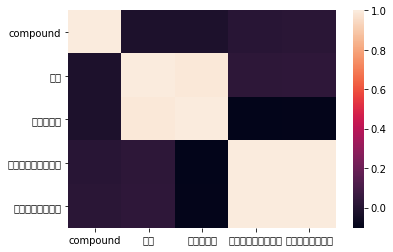

In [480]:
import seaborn as sns

dv_cor = dv.corr()
sns.heatmap(dv_cor)

c:\Users\subin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\subin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\subin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\subin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\subin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\subin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45824 missing from c

<AxesSubplot:>

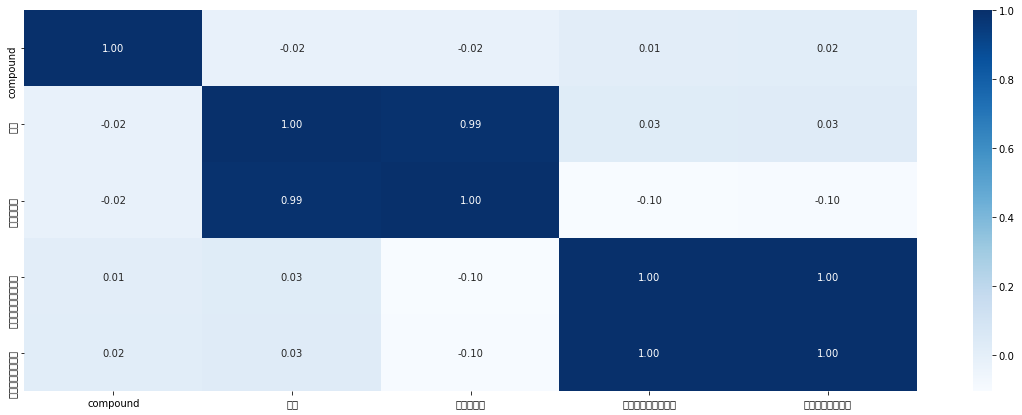

In [484]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,7))
sns.heatmap(dv_cor, annot=True, fmt=".2f", cmap="Blues")

# 상관계수 검정
> 상관계수 값 자체가 유의미한가를 검정 : p-value

In [471]:
import scipy.stats as stats
stats.pearsonr(x,y)

# 뒤의 값이 p-value


(0.01961302579877896, 0.8061598027952275)

> 0에 아주 매우 가까운 값이 나왔으므로 귀무가설을 기각할 수 있음을 알 수 있음

상관계수 블로그 https://ordo.tistory.com/100